In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 22974140843556864.0000 - val_loss: 14617879248896.0000
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 7723965480960.0000 - val_loss: 3417093177344.0000
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1805567131648.0000 - val_loss: 798785208320.0000
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 422071730176.0000 - val_loss: 186725285888.0000
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 98664177664.0000 - val_loss: 43649105920.0000
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 23063830528.0000 - val_loss: 10203471872.0000
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 5391436288.0000 - val_loss: 2385182208.0000
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 1260309504.0000 - val_loss: 557564992.0000
Epoch 9/20
363/363 [=======

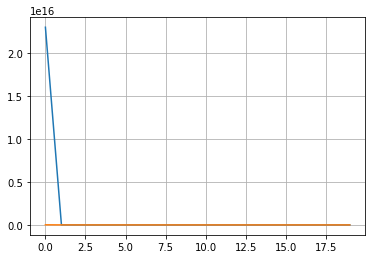

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history2 = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
mse_test2 = model.evaluate(X_test_scaled, y_test)
X_new2 = X_test_scaled[:3]
y_pred2 = model.predict(X_new2)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 3s 7ms/step - loss: 1.9197 - val_loss: 3.8361
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.8247 - val_loss: 1.6986
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6937 - val_loss: 0.8313
Epoch 4/20
363/363 [==============================] - 4s 10ms/step - loss: 0.6350 - val_loss: 0.6322
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5964 - val_loss: 0.5551
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5664 - val_loss: 0.5281
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5420 - val_loss: 0.5205
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5221 - val_loss: 0.5021
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5047 - val_loss: 0.4928
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4902 - val_loss: 0.4855
Epoch 11/

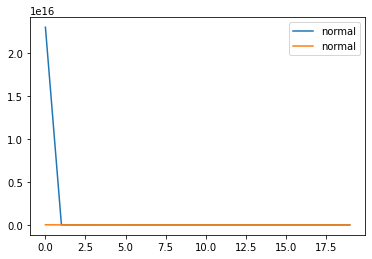

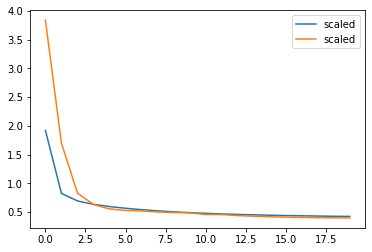

In [8]:
plt.plot(pd.DataFrame(history.history), label='normal')
plt.legend()
plt.show()
plt.plot(pd.DataFrame(history2.history), label='scaled')
plt.legend()
plt.show()

# Dane zawsze muszą być przeskalowane